# FastICA Algorithm Implementation

In [62]:
import librosa as lb
import soundfile as sf
from sklearn.decomposition import FastICA
import numpy as np
from matplotlib import pyplot as plt

##### reading the input files, one with music dominated and other with voice dominated
source 1: voice dominated and source 2: music dominated

In [192]:
voice, Vfs = sf.read('/Users/rajeshr/Desktop/Voice.wav')
print('Voice: length = {} and sampling freq : = {} '.format(len(voice), Vfs))

music, Mfs = sf.read('/Users/rajeshr/Desktop/Music.wav')
print('Music: length = {} and sampling freq : = {}  '.format(len(music), Mfs))


Voice: length = 1328256 and sampling freq : = 48000 
Music: length = 1227776 and sampling freq : = 44100  


##### slicing it into same length and same number of channels (1D)

In [193]:
if len(voice) > len(music):
    voice = voice[:len(music)]
else:
    music = music[:len(voice)]
    
print('After Slicing Length & channels\nVoice = {}, Music = {}'.format(len(voice), len(music)))

#print(voice.shape, music.shape)
a, b = voice.T   #.mpeg has 2 channels. so taking the average
voice = (a+b)/2
print(voice.shape, music.shape)

After Slicing Length & channels
Voice = 1227776, Music = 1227776
(1227776,) (1227776,)


##### Plotting graphs

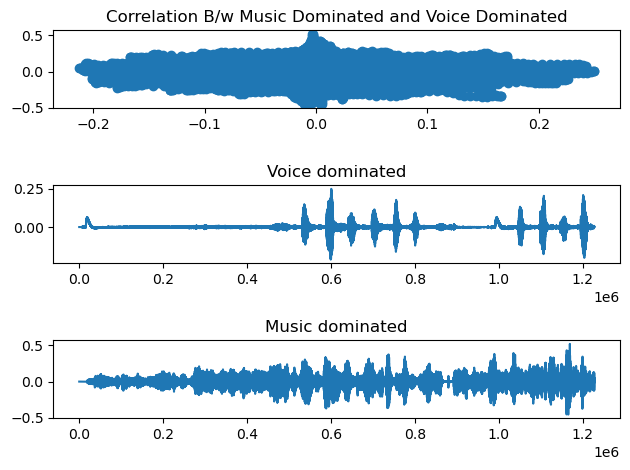

In [194]:
plt.subplot(3, 1, 1)
plt.scatter(voice, music)
plt.title('Correlation B/w Music Dominated and Voice Dominated')

plt.subplot(3, 1, 2)
x = np.arange(len(voice))
plt.plot(x, voice)
plt.title('Voice dominated')

plt.subplot(3, 1, 3)
plt.plot(x, music)
plt.title('Music dominated')
plt.tight_layout()
plt.show()

### Performing ICA

MIXING MATRIX A
 [[-1.99678804e+01 -3.39444264e-02]
 [ 3.89963147e-01 -6.20331007e+01]]


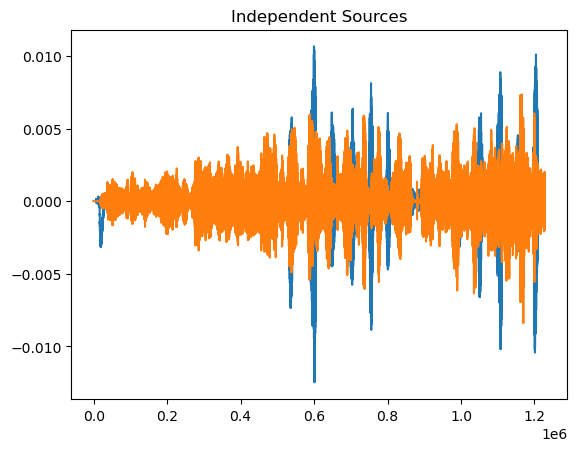

In [196]:
combinedSignals = np.c_[voice, music]

ica = FastICA(n_components=2)
S_ = ica.fit_transform(combinedSignals)  # Reconstruct signals
A_ = ica.mixing_  # Get estimated mixing matrix
print('MIXING MATRIX A\n', A_)

xs = np.arange(len(S_))
plt.plot(xs, S_)
plt.title('Independent Sources')
plt.show()

voiceOut, musicOut = S_.T

##### Writing individual .wav files

In [156]:
sf.write('/Users/rajeshr/Desktop/ICA/Voiceout.wav', voiceOut, Vfs)
sf.write('/Users/rajeshr/Desktop/ICA/Musicout.wav', musicOut, Mfs)

##### Plotting Input vs Output 

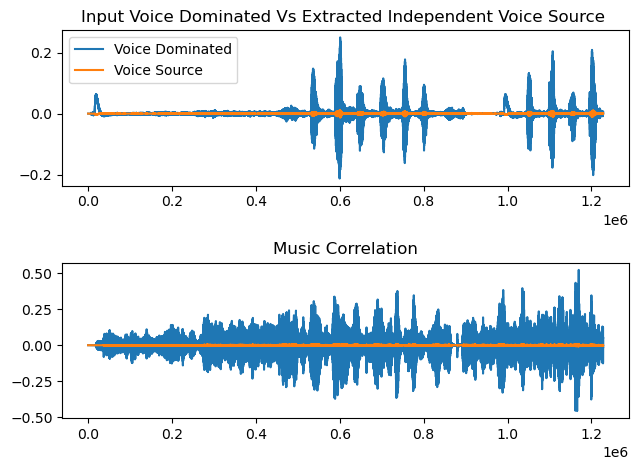

In [203]:
plt.subplot(2, 1, 1)
plt.plot(x1, voice)
plt.plot(x1, voiceOut)
plt.legend(['Voice Dominated','Voice Source'])
plt.title('Input Voice Dominated Vs Extracted Independent Voice Source ')

plt.subplot(2, 1, 2)
plt.plot(x2, music)
plt.plot(x2, musicOut)
plt.title('Music Correlation')
plt.tight_layout()
plt.show()

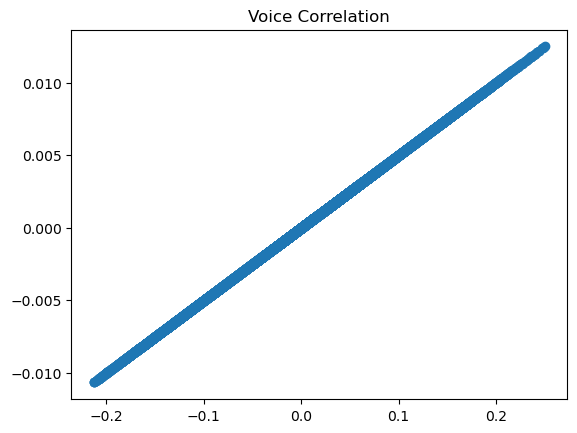

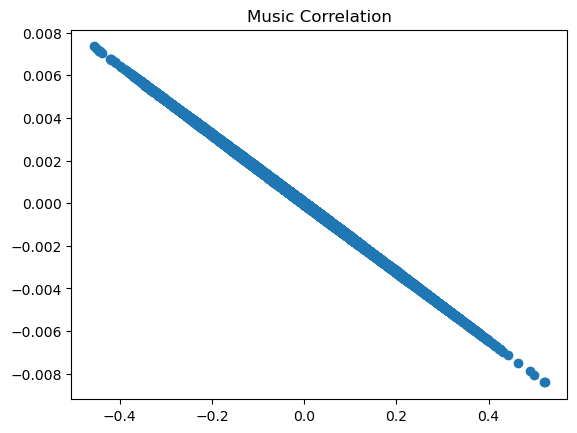

In [158]:
plt.scatter(voice, voiceOut)
plt.title('Voice Correlation')
plt.show()

plt.scatter(music, musicOut)
plt.title('Music Correlation')
plt.show()